# Importing a dataset
## Datasets
1. [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) (60,000 32x32 colour images in 10 classes)
2. [MNIST](http://yann.lecun.com/exdb/mnist/) (60,000 28x28 hand-written digits)

In [352]:
# imports
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pickle
import struct
from array import array
from os.path  import join

### CIFAR-10
Download python version [here](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)

In [353]:
# importing CIFAR-10 (link to a data batch)
file_location = './cifar-10/data_batch_1'

In [354]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [355]:
cifar = unpickle(file_location)[b'data']

In [356]:
# retrieve a random image
rand = np.random.randint(0, 10000) # every batch contains 10,000 images
image = cifar[rand]

In [357]:
# create a tensor
image = image.reshape(1, 3, 32, 32).astype(np.float32)
image = torch.from_numpy(image)

In [358]:
def show_tensor(image):
    image = image.cpu().detach().numpy()[0]
    image = image.swapaxes(0,1)
    image = image.swapaxes(1,2)
    plt.imshow(image.astype("uint8"))

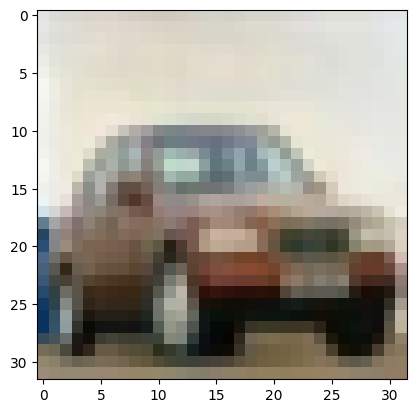

In [359]:
show_tensor(image)

## MNIST
Download [here](https://www.kaggle.com/datasets/hojjatk/mnist-dataset/download?datasetVersionNumber=1)

In [360]:
# importing MNIST (link to training set)
input_path = './mnist'
images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')

In [361]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#

#
# MNIST Data Loader Class
#    
def read_images_labels():        
    with open(images_filepath, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        if magic != 2051:
            raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
        image_data = array("B", file.read())        
    images = []
    for i in range(size):
        images.append([0] * rows * cols)
    for i in range(size):
        img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
        img = img.reshape(28, 28)
        images[i][:] = img            

    return images

In [362]:
#
# Load MINST dataset
#
mnist = read_images_labels()

#
# Retrieve a random training images 
#
r = random.randint(1, 60000)
image = mnist[r]

In [363]:
# Create a tensor
image = np.array(image)
image = image.reshape(28, 28).astype(np.float32)
image = torch.from_numpy(image)
image = image.repeat(1, 3, 1, 1)

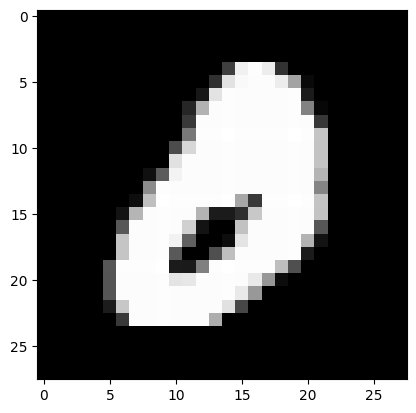

In [364]:
show_tensor(image)

## Noise
1. Salt-and-pepper
2. Gaussian
3. Speckle
4. Poisson

In [365]:
#imports
import copy

In [366]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[2]):
        for j in range(image.shape[3]):
            rdn = random.random()
            if rdn < prob:
                output[0][0][i][j] = 0
                output[0][1][i][j] = 0
                output[0][2][i][j] = 0
            elif rdn > thres:
                output[0][0][i][j] = 255
                output[0][1][i][j] = 255
                output[0][2][i][j] = 255
            else:
                output[0][0][i][j] = image[0][0][i][j]
                output[0][1][i][j] = image[0][1][i][j]
                output[0][2][i][j] = image[0][2][i][j]
    return output

## Demonstration

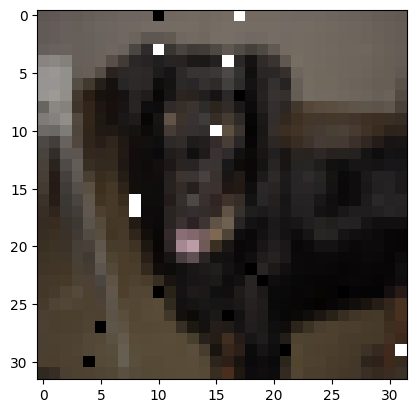

In [369]:
# retrieve a random image
rand = np.random.randint(0, 10000)
image = cifar[rand]
image = image.reshape(1, 3, 32, 32).astype(np.float32)

image_noise = copy.deepcopy(image)
image_noise = image_noise.reshape(1, 3, 32, 32).astype(np.float32)
image_noise = sp_noise(image_noise, 0.01)
image_noise = torch.from_numpy(image_noise)

image_original = torch.from_numpy(image)

show_tensor(image_noise)

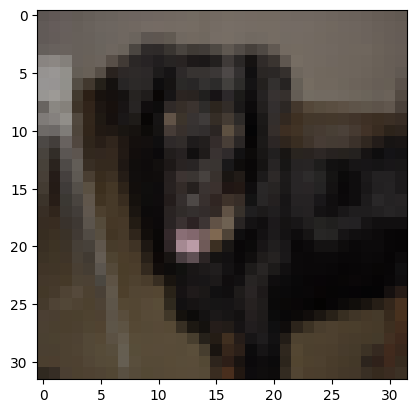

In [370]:
show_tensor(image_original)